In [1]:
import iapws
from matplotlib import pyplot as plt
import numpy as np

In [2]:
def f(v,t):
    r=8.3144621*10**-5
    a=0.4275
    b=0.08664
    #t=373.51
    return ((t**0.5)*v**3)+((-1*r*t**1.5)*v**2)+((a-((b**2)*(t**0.5))-(r*(t**1.5)*b))*v)-(a*b)

In [3]:
def f_prime(v,t):
    r=8.3144621*10**-5
    a=0.4275
    b=0.08664
    #t=373.51
    return ((3*(t**0.5)*v**2))+(2*((-1*r*t**1.5)*v**1))+((a-((b**2)*(t**0.5))-(r*(t**1.5)*b))*1)#-(a*b)

In [4]:
def newt(v,t):
    n=99999
    #t=373.51
    for i in range(n):
        if f_prime(v,t) == 0:
            return v
        v1=v
        v = v - f(v,t)/f_prime(v,t)
        #print(v)
        
        if abs(v1-v)<0.00001:
            break
    return v

In [5]:
def secant(v0,v1,n):
    for i in range(n):
        if f(v1,t)-f(v0,t) == 0:
            return v1
        v_temp = v1 - ((f(v1,t)*(v0-v1)*1.0)/(f(v0,t)-f(v1,t)))
        v0 = v1
        v1 = v_temp
        #print(v1)
    return v1

In [6]:
x=[]
y=[]
y1=[]
y2=[]
newt_err=[]
secant_err=[]
ig=10
ig2=0

In [7]:
for i in range(0,250,50):
    t=i+373.15
    x.append(t)
    esv=iapws.iapws97._Region1(t, 0.1)["v"] #exact specific volume
    y.append(esv)
    y1.append(newt(ig,t)/100)
    y2.append(secant(ig2,ig,99)/100)

In [8]:
for j in range(0,5):
    newt_err.append(y[j]-y1[j])
    secant_err.append(y[j]-y2[j])

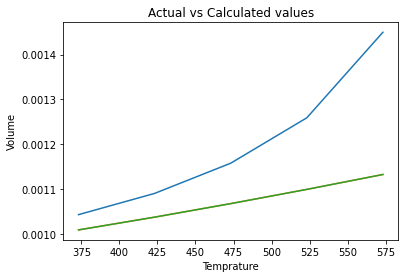

In [9]:
plt.plot(x,y)    
plt.plot(x,y1)    
plt.plot(x,y2)    
#plt.subplot2grid((3,3),(0,0), rowspan = 5)
plt.title("Actual vs Calculated values")    
plt.ylabel('Volume')    
plt.xlabel('Temprature')    
plt.show()   

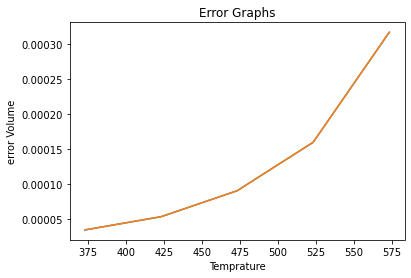

In [10]:
plt.plot(x,newt_err)    
plt.plot(x,secant_err)    
# plt.plot(x,y2)    
#plt.subplot2grid((3,3),(0,0), rowspan = 5)
plt.title("Error Graphs")    
plt.ylabel('error Volume')    
plt.xlabel('Temprature')    
plt.show()   

In [191]:
newt_err

[3.399658129158681e-05,
 5.285997867113907e-05,
 9.000055117615769e-05,
 0.0001593654515314332,
 0.0003167211610426788]

In [192]:
secant_err

[3.399658129316302e-05,
 5.2859978674690486e-05,
 9.000055118256597e-05,
 0.00015936545154107175,
 0.00031672116105510724]